# Something

In [10]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [14]:
###To start, set the path to open your image. In this example the image bands are in a folder called "Image" in the 
###working directory. B* means that the script will read in all band tifs collectively rather than having to code each one.
image_path = glob("Image\LC08_L1TP_207023_20211122_20211130_01_T1_B*.tif")
###Ensure the bands are sorted in order
image_path.sort()
###Stack the bands into a single image. Give the no data values. WHY? WHAT IS META? ARR_ST?
image, meta = es.stack(image_path, nodata=-9999)



In [24]:
###Function to calculate the ndvi based on the image that you open and stack, above.
def ndvi (image):
    ###Here we define the two bands used to calculate the NDVI: red band and near infrared (NIR) band
    ###These are changed to floats AND WHY IS THAT?
    red = image[3].astype(float)
    nir = image[4].astype(float)
    
    ###and calculate the ndvi using the formula and numpy's divide function
    my_ndvi = np.divide((nir-red), (nir+red))
    
    #give your plot a name
    plot_title = ["My plot name"]
    
    ###Depending on your area of interest you might like to change vmin and vmax. 
    ###If, for example, your values range from -0.3 to 0.4, try using e.g. -0.4 and 0.5 as vmin/vmax to get a clearer 
    ###idea of the actual spread of NDVI values. As NDVI values can mathematically range from -1 to 1 these are used as 
    ###default vmin/vmax.
    ###Feel free to change the colour map, too. RdYlGn (continuous scale of red -> green) is a commonly used one 
    ###with NDVI's, where darker greens represent healthier vegetation. 
    ###Choose more here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    ep.plot_bands(my_ndvi, cmap = "RdYlGn", title = plot_title, vmin = -1, vmax = 1)
    
    ###and create the classes you want on your ndvi. Edit these as you please. -np.inf and np.inf will take the negative
    ###and positive extremities. This will create 5 classes, but you can add more (just remember to assign them a colour below)
    ndvi_classes = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]
    ###WHAT DOES DIGITIZE DO? Classify the image based on classes above.
    image_ndvi_class = np.digitize(my_ndvi, ndvi_classes)
    ### Apply the nodata mask to the newly classified NDVI data. WHY? TRY WITHOUT.
    image_ndvi_class = np.ma.masked_where(np.ma.getmask(my_ndvi), image_ndvi_class)
    np.unique(image_ndvi_class)
    
    #define colour map and class names
    ndvi_colours = ["blue", "green", "yellow", "red", "pink"]
    #is this necessary?
    ndvi_cmap = ListedColormap(ndvi_colours)
    ndvi_class_names = [
        "No Vegetation",
        "Bare Earth",
        "Low Density Vegetation",
        "Moderate Density Vegetation",
        "High Density Vegetation"
    ]
    
    # Get list of classes
    classes = np.unique(image_ndvi_class)
    classes = classes.tolist()
    # The mask returns a value of none in the classes. remove that
    classes = classes[0:5]

    # Plot your data
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(image_ndvi_class, cmap=ndvi_cmap)

    ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_class_names)
    ax.set_title(
        "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
        fontsize=14,
    )
    ax.set_axis_off()

    # Auto adjust subplot to fit figure size
    plt.tight_layout()

C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


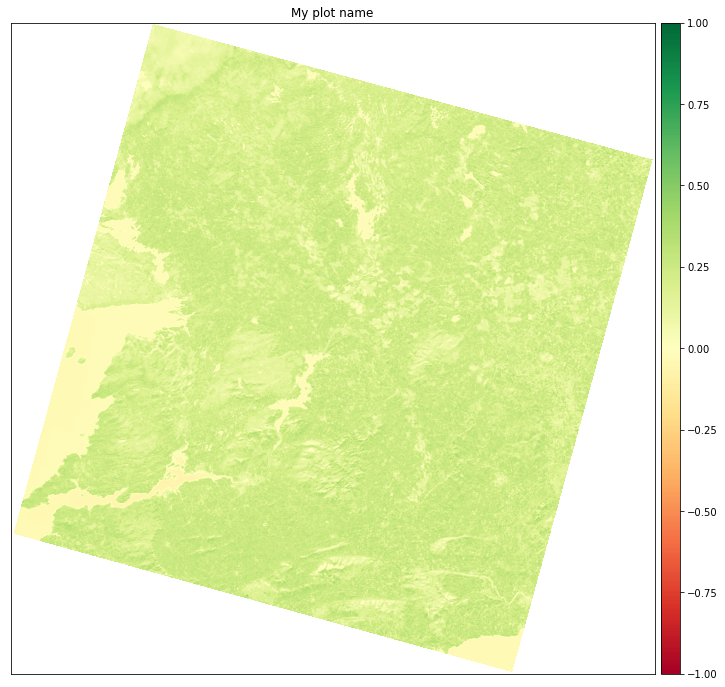

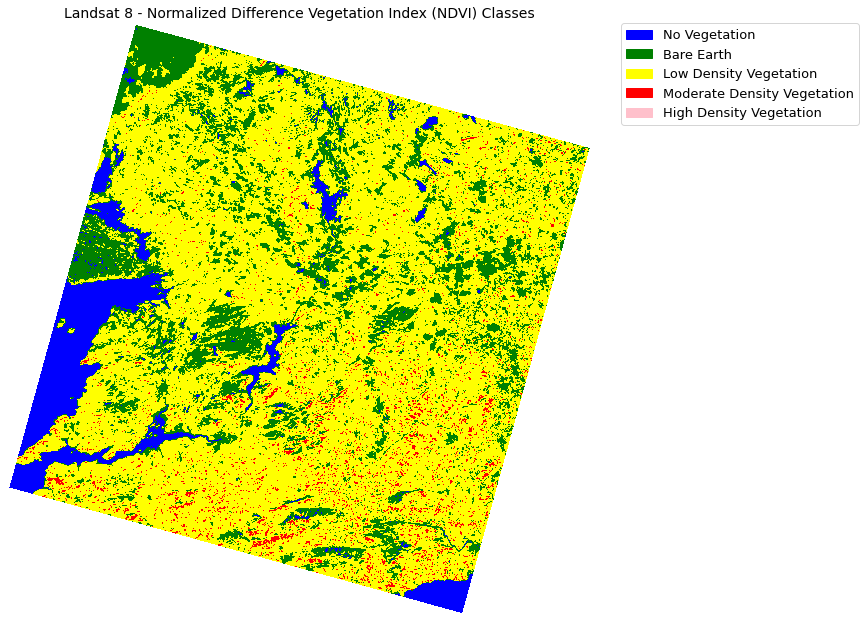

In [25]:
###run the function on your image. This will give you the plotted output for the NDVI.
ndvi(image)

C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


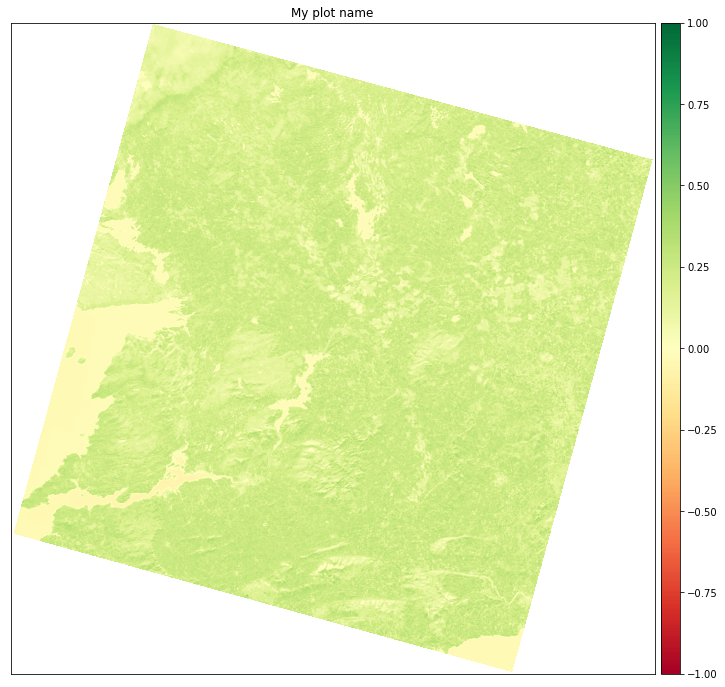